# One-way anova test

In [120]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### 1. Define the null and alternate hypotheses

H<sub>0</sub>: <em>no diferences</em> between given data  
H<sub>1</sub>: <em>diferences</em> between given data

### 2. Define the level of confidence and significance

1 - α = 95%  
α = 5%

### 3. Select the test statistic

<em>anova</em>

### 4. Calculate the test statistic

In [5]:
data = [
  {
    'id': 'a',
    'data': [5, 2, 7, 6, 9, 2, 1, 8]
  },
  {
    'id': 'b',
    'data': [6, 5, 8, 6, 2, 2, 1, 9]
  },
  {
    'id': 'c',
    'data': [7, 7, 6, 5, 4, 2, 3, 1]
  },
  {
    'id': 'd',
    'data': [9, 6, 7, 1, 5, 9, 4, 6]
  },
  {
    'id': 'e',
    'data': [8, 10, 8, 4, 6, 6, 9, 9]
  },
]

In [58]:
n = sum([ len(i['data']) for i in data ])
n

40

In [67]:
x_tested = sum([ sum(i['data']) for i in data ])/n
x_tested

5.525

In [66]:
lg = n-1
lg

39

In [106]:
xi_x = []
for i in data:
  xi_x.append([ (j-x_tested)**2 for j in i['data'] ])
  scTotal = sum([ sum(j) for j in xi_x ])
scTotal

285.975

In [108]:
glEntre = len(data)-1
avg = []
for i in data:
  avg.append( sum([ j for j in i['data']])/len(i['data']) )
  scEntre = sum([ len(i['data']) * (j - x_tested)**2 for j in avg ])
s2e = scEntre/glEntre

In [113]:
glIntra=n-len(data)
xi_avg = []
for i in data:
  xi_avg.append([ (j - sum([ j for j in i['data']])/len(i['data']) )**2 for j in i['data'] ])
  scIntra = sum([ sum(j) for j in xi_avg ])
s2r = scIntra/glIntra

In [122]:
f = s2e/s2r
gl = [scEntre, scIntra]
criticalValue =  stats.f.isf(0.05, scEntre, scIntra)

### 5. Acceptance and rejection region

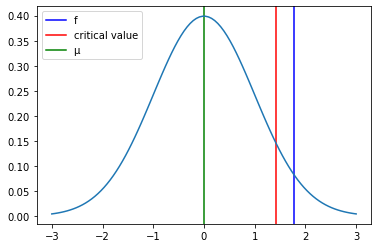

In [123]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.axvline(x=f, color="blue")
plt.axvline(x=criticalValue, color="red")
plt.axvline(x=mu, color="green")
plt.legend(["f", "critical value", "µ"])
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

### 6. Set decision rule

#### H<sub>0</sub> is rejected
#### H<sub>1</sub> is accepted

### 7. Draw conclusions

With a confidence level of 95% it is affirmed that there are differences between the groups